In [7]:
import pandas as pd
import numpy as np

df=pd.read_csv('C:/Users/User/Documents/Strive_AI_Jun_21/M4-Feature Engineering/03. Data Enhancement/data/london_merged.csv')
# print(df)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [70]:

"""
    "timestamp" - timestamp field for grouping the data
    "cnt" - the count of a new bike shares
    "t1" - real temperature in C
    "t2" - temperature in C "feels like"
    "hum" - humidity in percentage
    "windspeed" - wind speed in km/h
    "weathercode" - category of the weather
    "isholiday" - boolean field - 1 holiday / 0 non holiday
    "isweekend" - boolean field - 1 if the day is weekend
    "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
"""

'\n    "timestamp" - timestamp field for grouping the data\n    "cnt" - the count of a new bike shares\n    "t1" - real temperature in C\n    "t2" - temperature in C "feels like"\n    "hum" - humidity in percentage\n    "windspeed" - wind speed in km/h\n    "weathercode" - category of the weather\n    "isholiday" - boolean field - 1 holiday / 0 non holiday\n    "isweekend" - boolean field - 1 if the day is weekend\n    "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.\n'

In [3]:
print(df.isnull().sum())

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [4]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [6]:
df_new = df.copy()
df_new.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df_new=df_new.drop(['timestamp'],axis=1)


In [14]:
df_new.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


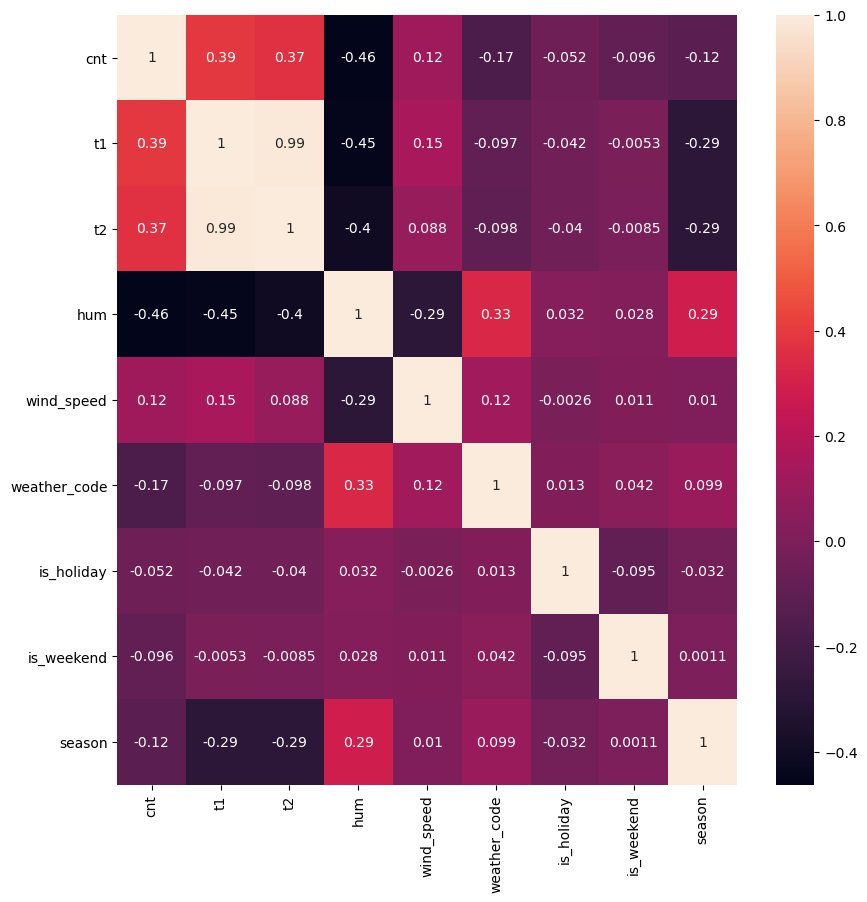

In [29]:
#get correlations of each feature in dataset
#correlation greater than 0.2 with the cnt
import seaborn as sns
import matplotlib.pyplot as plt
cor_mat = df_new.corr()
top_cor_ft = cor_mat.index
plt.figure(figsize=(10,10))
sns.heatmap(df_new[top_cor_ft].corr(),annot=True)
plt.show()

In [47]:
df_new=df_new.assign(F_t1 = lambda x: (9/5)*x['t1']+32)
df_new=df_new.assign(F_t2 = lambda x: (9/5)*x['t2']+32)
df_new.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,F_t1,F_t2
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,37.4,35.6
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,37.4,36.5
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,36.5,36.5
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,35.6,35.6
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,35.6,32.0


In [49]:
X,y = df_new.drop(['cnt','t1','t2'],axis=1),df_new['cnt']
X.head()

,hum,wind_speed,weather_code,is_holiday,is_weekend,season,F_t1,F_t2
0,93.0,6.0,3.0,0.0,1.0,3.0,37.4,35.6
1,93.0,5.0,1.0,0.0,1.0,3.0,37.4,36.5
2,96.5,0.0,1.0,0.0,1.0,3.0,36.5,36.5
3,100.0,0.0,1.0,0.0,1.0,3.0,35.6,35.6
4,93.0,6.5,1.0,0.0,1.0,3.0,35.6,32.0


In [ ]:
#univariate selection # selecting the best features

In [50]:
#apply selectKBest.class to extact top five best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_ft = SelectKBest(score_func = chi2, k=5)
model =best_ft.fit(X,y)

In [60]:
df_new_scores=pd.DataFrame(model.scores_)
df_columns =pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['features','scores']
feature_scores #highest the score 

,features,scores
0,hum,24279.607902
1,wind_speed,15579.895805
2,weather_code,6065.637403
3,is_holiday,2832.633234
4,is_weekend,3267.210811
5,season,2940.289243
6,F_t1,12511.440420
7,F_t2,17002.416164


In [68]:
best_features = feature_scores.nlargest(5,'scores')['features'].tolist()
best_features

['hum', 'F_t2', 'wind_speed', 'F_t1', 'weather_code']

In [73]:
X_new = X[best_features]